## Imputación de datos

In [1]:
from sklearn.impute import SimpleImputer
import pandas as pd

In [17]:
df = pd.read_csv('hepatitis.csv')
columnas = ['EDAD', 'SEXO', 'ESTEROIDES', 'ANTIVIRALES', 'FATIGA', 'MALAISE', 'ANOREXIA', 'HIGgrande', 'HIGfirme', 'BAZOpalpa', 'ARANIAVASC',
            'ASCITIS', 'VARICES', 'BILIRRUBINA', 'FOSFATOalc', 'SGOT', 'ALBUMIA', 'PROTIME', 'HISTIOLOGIA', 'PRONOSTICO']
df.columns = columnas
df['BILIRRUBINA'] = pd.to_numeric(df['BILIRRUBINA'], errors='coerce')
df.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIAVASC,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMIA,PROTIME,HISTIOLOGIA,PRONOSTICO
0,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135,42,3.5,*,0,1
1,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96,32,4.0,*,0,1
2,31,0,*,1,0,0,0,1,0,0,0,0,0,0.7,46,52,4.0,80,0,1
3,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,*,200,4.0,*,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,0.9,95,28,4.0,75,0,1


In [18]:
df_imp = df.copy()
si = SimpleImputer(strategy='mean')

In [19]:
# Usamos reshape porque el SimpleImputer recibe columnas y no filas
df_imp['BILIRRUBINA'] = si.fit_transform(df_imp['BILIRRUBINA'].values.reshape(-1, 1))
df_imp['BILIRRUBINA']

0      0.9
1      0.7
2      0.7
3      1.0
4      0.9
      ... 
149    7.6
150    0.9
151    0.8
152    1.5
153    1.2
Name: BILIRRUBINA, Length: 154, dtype: float64

<Axes: xlabel='EDAD', ylabel='BILIRRUBINA'>

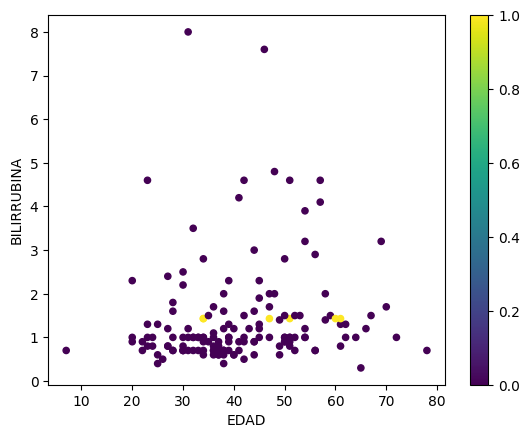

In [20]:
null_values = df['BILIRRUBINA'].isnull()
df_imp.plot(x='EDAD', y='BILIRRUBINA', kind='scatter', c=null_values, cmap='viridis')

In [ ]:
df_imp2 = df.copy()
si = SimpleImputer(strategy='median')
df_imp2['BILIRRUBINA'] = si.fit_transform(df_imp2['BILIRRUBINA'].values.reshape(-1, 1))
df_imp2.plot(x='EDAD', y='BILIRRUBINA', kind='scatter', c=null_values, cmap='viridis')
